In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,NaN,15.6,127.0,NaN,3.06,0.28,NaN,5.64,1.04,3.92,1065.0
1,13.20,NaN,NaN,11.2,100.0,2.65,2.76,0.26,1.28,NaN,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,NaN,2.80,3.24,0.30,2.81,5.68,1.03,3.17,NaN
3,14.37,1.95,2.50,16.8,113.0,NaN,NaN,0.24,NaN,NaN,0.86,3.45,1480.0
4,13.24,2.59,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,NaN,0.52,NaN,NaN,0.64,1.74,740.0
174,13.40,NaN,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,NaN,750.0
175,13.27,NaN,2.26,20.0,120.0,1.59,0.69,0.43,1.35,NaN,NaN,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,NaN,NaN,0.53,1.46,9.30,0.60,NaN,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	60
float64		column 3	45
float64		column 4	31
float64		column 5	16
float64		column 6	46
float64		column 7	45
float64		column 8	15
float64		column 9	15
float64		column 10	45
float64		column 11	31
float64		column 12	61
float64		column 13	16


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,148.000000,118.000000,133.000000,147.000000,162.000000,132.00000,133.000000,163.000000,163.000000,133.000000,147.000000,117.000000,162.000000
mean,13.006284,2.252881,2.368647,19.623129,99.820988,2.25803,1.964737,0.362331,1.599387,4.923459,0.959224,2.706838,739.358025
std,0.771417,0.986683,0.250260,3.127476,14.356986,0.57218,0.950401,0.118001,0.569455,2.101724,0.215328,0.618082,312.872578
min,11.030000,0.980000,1.360000,10.600000,70.000000,0.98000,0.340000,0.170000,0.410000,1.280000,0.480000,1.290000,278.000000
25%,12.370000,1.642500,2.250000,17.700000,88.250000,1.79750,1.250000,0.270000,1.250000,3.300000,0.815000,2.310000,504.000000
50%,13.050000,1.885000,2.380000,19.500000,98.000000,2.26500,2.030000,0.340000,1.560000,4.680000,0.970000,2.820000,660.000000
75%,13.640000,2.740000,2.530000,21.500000,107.000000,2.70000,2.680000,0.430000,1.935000,5.750000,1.090000,3.160000,918.750000
max,14.830000,5.800000,3.220000,30.000000,162.000000,3.40000,5.080000,0.660000,3.580000,13.000000,1.710000,3.920000,1680.000000


<AxesSubplot:>

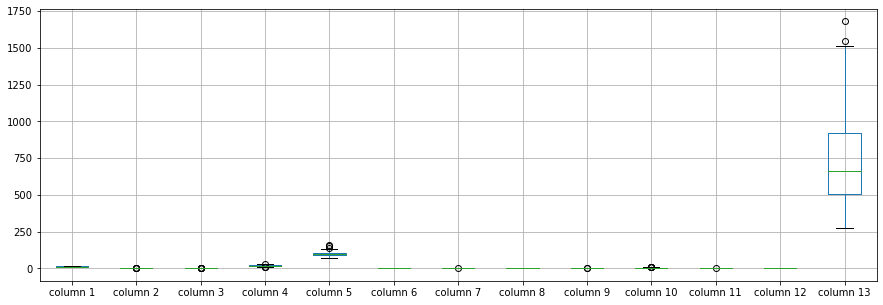

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.006284
column 2       2.252881
column 3       2.368647
column 4      19.623129
column 5      99.820988
column 6       2.258030
column 7       1.964737
column 8       0.362331
column 9       1.599387
column 10      4.923459
column 11      0.959224
column 12      2.706838
column 13    739.358025
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.018342,0.258886,-0.240916,0.247065,0.281466,0.364123,-0.211137,0.137232,0.539861,-0.001627,0.109187,0.668322
column 2,-0.018342,1.000000,0.045626,0.211311,-0.115346,-0.308605,-0.411377,0.324360,-0.259865,0.178811,-0.501828,-0.409357,-0.159568
column 3,0.258886,0.045626,1.000000,0.429019,0.201488,0.097866,-0.034587,0.077238,-0.066528,0.305002,-0.048490,0.103761,0.209524
column 4,-0.240916,0.211311,0.429019,1.000000,-0.101388,-0.180347,-0.419237,0.312619,-0.132947,0.026715,-0.207863,-0.173850,-0.392192
column 5,0.247065,-0.115346,0.201488,-0.101388,1.000000,0.184973,0.152524,-0.231220,0.192580,0.233924,0.042926,0.127048,0.386172
column 6,0.281466,-0.308605,0.097866,-0.180347,0.184973,1.000000,0.814803,-0.378325,0.610838,-0.063182,0.481477,0.660887,0.432301
column 7,0.364123,-0.411377,-0.034587,-0.419237,0.152524,0.814803,1.000000,-0.531139,0.614294,-0.096333,0.548431,0.698323,0.396928
column 8,-0.211137,0.324360,0.077238,0.312619,-0.231220,-0.378325,-0.531139,1.000000,-0.289194,0.016149,-0.222443,-0.417940,-0.283165
column 9,0.137232,-0.259865,-0.066528,-0.132947,0.192580,0.610838,0.614294,-0.289194,1.000000,-0.027513,0.253415,0.484338,0.336549
column 10,0.539861,0.178811,0.305002,0.026715,0.233924,-0.063182,-0.096333,0.016149,-0.027513,1.000000,-0.438630,-0.198536,0.297403


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+101,13+101+101,13+101+101,13+101+101+101+101,13+101+101+101+101+101,13+101+101+101+101+101+101,13+101+101+101+101+101,13+101+101+101+101,13+101+101+101,13+101+101,13+101,13], vae_layer = False, seed = 1010)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 856.0020862926136
Epoch: 1 , loss: 855.1836381392045
Epoch: 2 , loss: 864.5815096768466
Epoch: 3 , loss: 858.4573419744319
Epoch: 4 , loss: 858.7202869762074
Epoch: 5 , loss: 857.6850641424006
Epoch: 6 , loss: 865.4352084073154
Epoch: 7 , loss: 863.3226817737926
Epoch: 8 , loss: 867.314375443892
Epoch: 9 , loss: 856.8419078480114
Epoch: 10 , loss: 860.1554010564631
Epoch: 11 , loss: 863.3241854580966
Epoch: 12 , loss: 855.0209239612926
Epoch: 13 , loss: 853.6701715642756
Epoch: 14 , loss: 848.5290860262784
Epoch: 15 , loss: 853.9533802379261
Epoch: 16 , loss: 850.4127419211648
Epoch: 17 , loss: 851.380332253196
Epoch: 18 , loss: 847.0184659090909
Epoch: 19 , loss: 847.2580011541194
Epoch: 20 , loss: 840.5850830078125
Epoch: 21 , loss: 834.9808904474431
Epoch: 22 , loss: 837.8901977539062
Epoch: 23 , loss: 840.6449751420455
Epoch: 24 , loss: 837.5196644176136
Epoch: 25 , loss: 828.1517888849431
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       1.104595
column 3       2.650000
column 4      18.600000
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       0.147035
column 9       1.980000
column 10      4.500000
column 11      1.030000
column 12      0.282119
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,-1.164294,0.0,0.000000,-1.511057,0.000000,0.0,-0.434786,0.000000,0.000000,0.000000,0.000000
1,0.0,-1.746909,-2.107752,0.0,0.000000,0.000000,0.000000,0.0,0.000000,-4.337315,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,-72.915123,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-1024.181488
3,0.0,0.000000,0.000000,0.0,0.000000,-3.616919,-3.577689,0.0,-1.803892,-6.587273,0.000000,0.000000,0.000000
4,0.0,0.000000,-2.383480,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1.022668,0.0,-0.870088,-3.455055,0.000000,0.000000,0.000000
174,0.0,-0.611356,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.863453,0.000000
175,0.0,-3.002592,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,-8.312163,-0.371979,0.000000,0.000000
176,0.0,0.000000,0.000000,0.0,0.000000,-0.824378,-0.590583,0.0,0.000000,0.000000,0.000000,-0.660470,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3122.9572633787366, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.28656036911798977

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       1.850598
column 4      15.000000
column 5      78.000000
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      1.787612
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.710000,1.265706,15.6,127.000000,1.288943,3.060000,0.28,1.855214,5.640000,1.040000,3.920000,1065.000000
1,13.20,0.033091,0.032248,11.2,100.000000,2.650000,2.760000,0.26,1.280000,0.042685,1.050000,3.400000,1050.000000
2,13.16,2.360000,2.670000,18.6,28.084877,2.800000,3.240000,0.30,2.810000,5.680000,1.030000,3.170000,160.818512
3,14.37,1.950000,2.500000,16.8,113.000000,0.233081,-0.087689,0.24,0.376108,1.212727,0.860000,3.450000,1480.000000
4,13.24,2.590000,0.486520,21.0,118.000000,2.800000,2.690000,0.39,1.820000,4.320000,1.040000,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.650000,2.450000,20.5,95.000000,1.680000,-0.412668,0.52,0.189912,4.244945,0.640000,1.740000,740.000000
174,13.40,3.298644,2.480000,23.0,102.000000,1.800000,0.750000,0.43,1.410000,7.300000,0.700000,2.423453,750.000000
175,13.27,1.277408,2.260000,20.0,120.000000,1.590000,0.690000,0.43,1.350000,1.887837,0.218021,1.560000,835.000000
176,13.17,2.590000,2.370000,20.0,120.000000,0.825622,0.089417,0.53,1.460000,9.300000,0.600000,0.959530,840.000000


In [20]:
imputations[-1].to_excel("Wine_NL_20(imp).xlsx", index=False, header=False)